In [2]:
import pandas as pd
import numpy as np
from pydataset import data
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=sns.load_dataset('penguins')

In [4]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### What are the different species of penguins present in the dataset, and how many samples are available for each species?

Adelie: 152 samples
Chinstrap: 68 samples
Gentoo: 124 samples


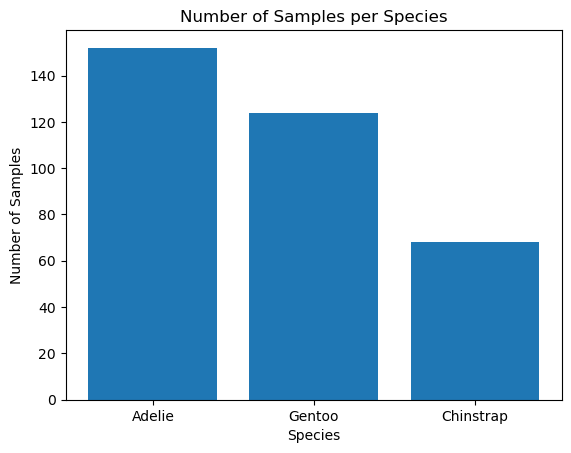

In [6]:
species = df['species'].unique()
sample_counts = df['species'].value_counts()

for specie in species:
    count = sample_counts[specie]
    print(f"{specie}: {count} samples")
    
plt.bar(sample_counts.index, sample_counts.values)
plt.xlabel('Species')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Species')
plt.show()


### Which island has the highest number of penguin observations? Are there any significant differences in the distribution of penguin species across different islands?

In [8]:
island_counts = df['island'].value_counts()

max_island = island_counts.idxmax()
max_count = island_counts.max()

print(f"The island with the highest number of penguin observations is {max_island} with {max_count} observations.")

species_by_island = df.groupby(['island', 'species']).size().unstack()

The island with the highest number of penguin observations is Biscoe with 168 observations.


<Axes: xlabel='island'>

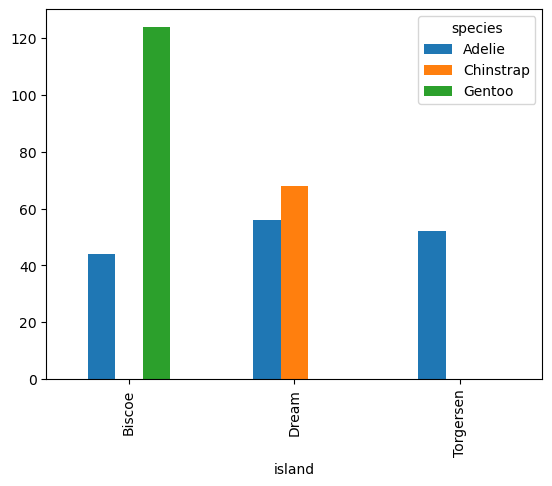

In [10]:
species_by_island.plot.bar()

### Is there a relationship between the bill length and bill depth of penguins? Can we observe any patterns or correlations?

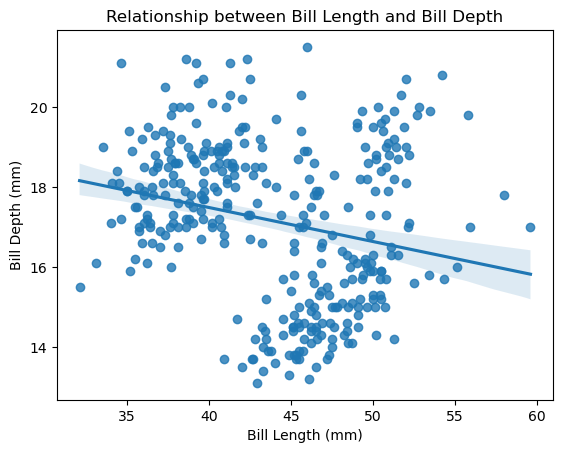

The correlation coefficient between bill length and bill depth is: -0.2350528703555326


In [12]:

filtered_df = df[['bill_length_mm', 'bill_depth_mm']].dropna()

sns.regplot(data=filtered_df, x='bill_length_mm', y='bill_depth_mm')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Relationship between Bill Length and Bill Depth')
plt.show()

correlation = filtered_df['bill_length_mm'].corr(filtered_df['bill_depth_mm'])
print(f"The correlation coefficient between bill length and bill depth is: {correlation}")


### How does the flipper length vary across different penguin species? Are there any significant differences in flipper length between males and females?

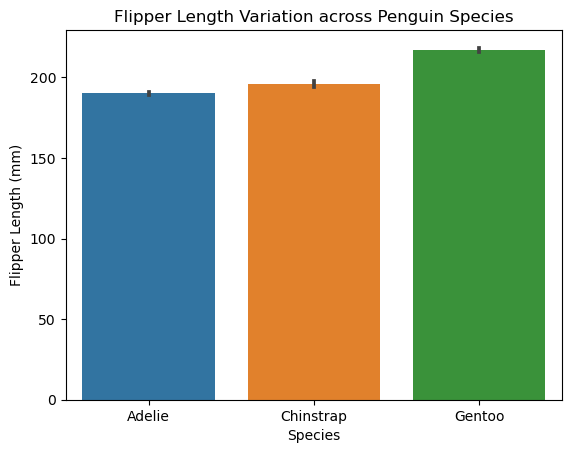

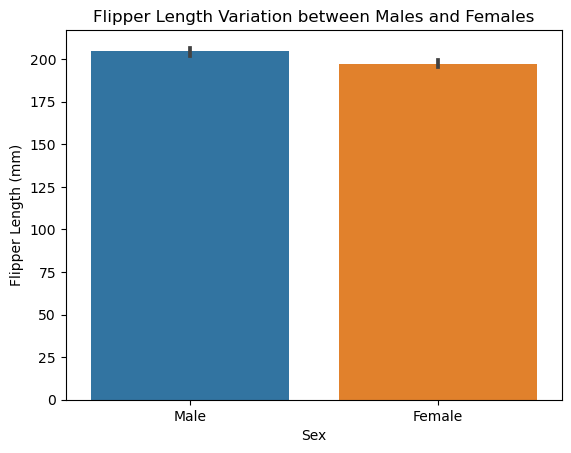

In [15]:
filtered_df = df[['flipper_length_mm', 'species', 'sex']].dropna()

sns.barplot(data=filtered_df, x='species', y='flipper_length_mm')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length Variation across Penguin Species')
plt.show()

filtered_gender_df = df[['flipper_length_mm', 'sex']].dropna()

sns.barplot(data=filtered_gender_df, x='sex', y='flipper_length_mm')
plt.xlabel('Sex')
plt.ylabel('Flipper Length (mm)')
plt.title('Flipper Length Variation between Males and Females')
plt.show()


### What is the average body mass of penguins in the dataset? Are there any notable differences in body mass based on species or sex?

The average body mass of penguins in the dataset is: 4207.06 grams


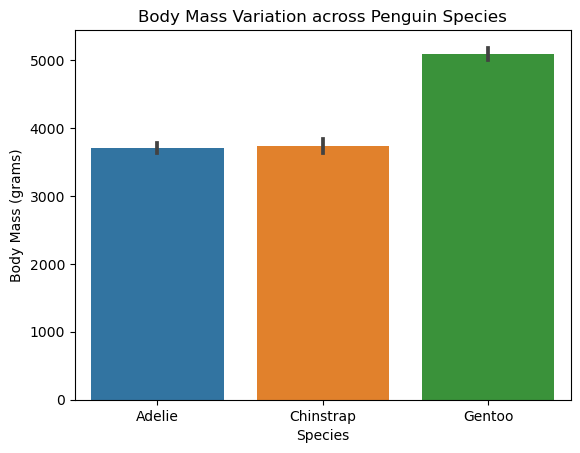

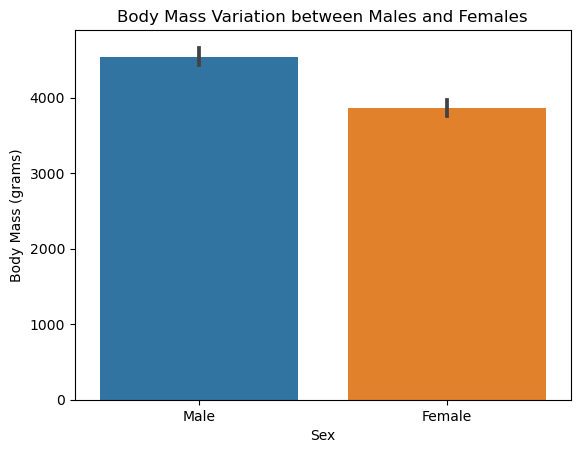

In [16]:
filtered_df = df[['body_mass_g', 'species', 'sex']].dropna()

average_mass = filtered_df['body_mass_g'].mean()
print(f"The average body mass of penguins in the dataset is: {average_mass:.2f} grams")

sns.barplot(data=filtered_df, x='species', y='body_mass_g')
plt.xlabel('Species')
plt.ylabel('Body Mass (grams)')
plt.title('Body Mass Variation across Penguin Species')
plt.show()

sns.barplot(data=filtered_df, x='sex', y='body_mass_g')
plt.xlabel('Sex')
plt.ylabel('Body Mass (grams)')
plt.title('Body Mass Variation between Males and Females')
plt.show()


### Can we determine any distinct characteristics or features that differentiate male and female penguins based on the available data?

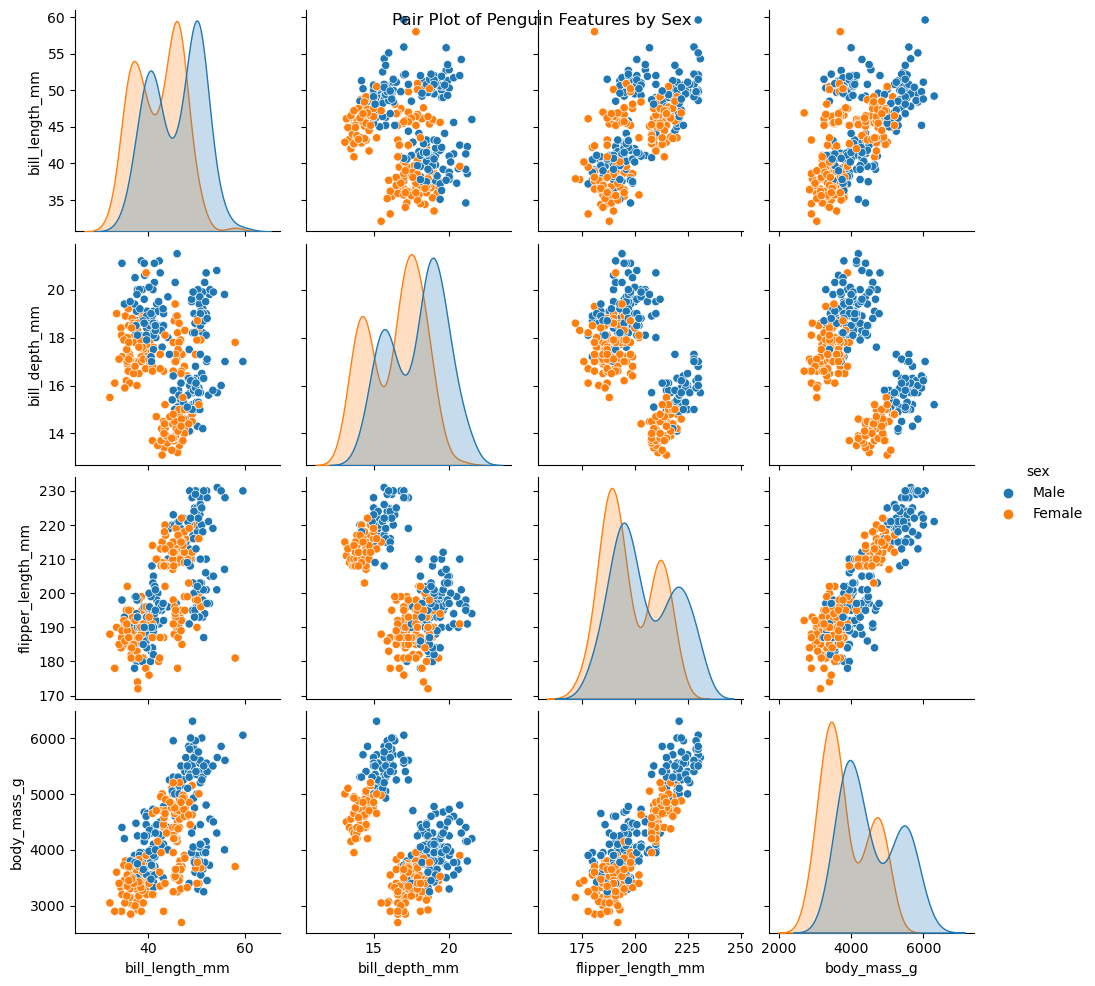

In [17]:
filtered_df = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].dropna()

sns.pairplot(data=filtered_df, hue='sex')
plt.suptitle('Pair Plot of Penguin Features by Sex')
plt.show()


### Are there any outliers or unusual observations in the dataset that need to be investigated further?

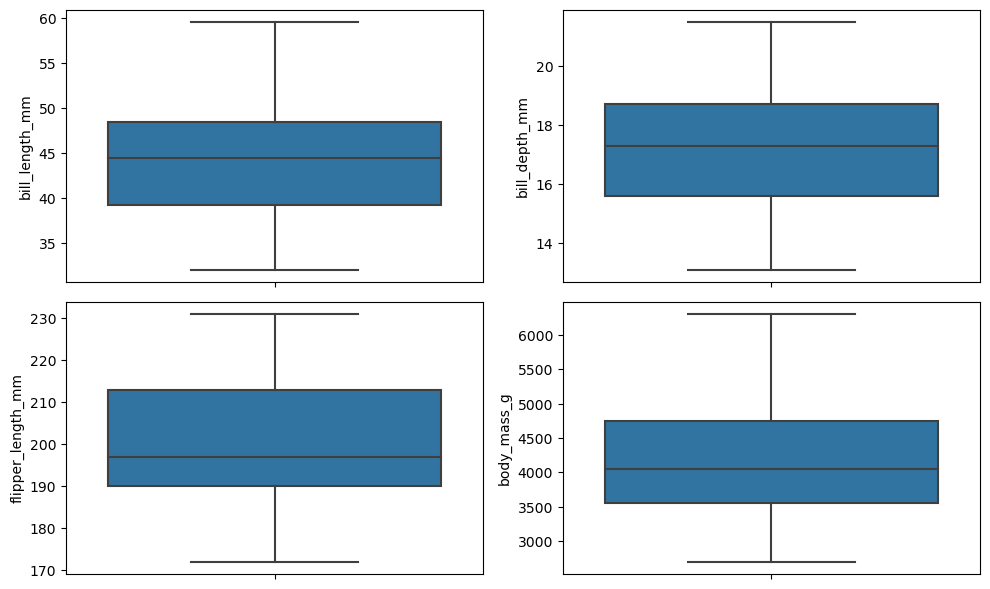

In [18]:
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=column)
    plt.ylabel(column)
plt.tight_layout()
plt.show()


### Can we identify any missing values or inconsistencies in the dataset that might impact the analysis?

In [19]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

categorical_columns = ['species', 'island', 'sex']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Inconsistencies in {column}:\n", df[~df[column].isin(unique_values)])

numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for column in numerical_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Inconsistencies in {column}:\n", df[(df[column] < min_value) | (df[column] > max_value)])


Missing values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Inconsistencies in species:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Inconsistencies in island:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Inconsistencies in sex:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Inconsistencies in bill_length_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Inconsistencies in bill_depth_mm:
 Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []
Inconsistencies in flipper_length_mm:
 Empty